<a href="https://colab.research.google.com/github/LiuJieKun-DL/Basic-Libraries-of-Python/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Necessary Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic Graph

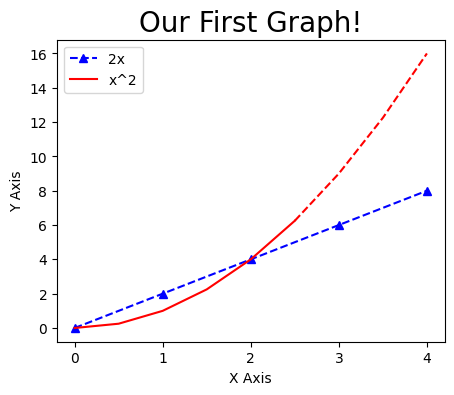

In [96]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your graph
plt.figure(figsize=(5,4),dpi=100)

#plt.plot(x,y,label='y = 2x',color='cyan',linewidth=1.2,linestyle='--',marker='.',markersize=10,markeredgecolor='red')

# Use short hand notation
# fmt = '[color][marker][line]'
plt.plot(x,y,'b^--',label='2x')
# Line Number Two
x2 = np.arange(0,4.5,0.5)
plt.plot(x2[:6],x2[:6]**2,'r',label='x^2')
plt.plot(x2[5:],x2[5:]**2,'r--')

plt.title('Our First Graph!',fontdict={'fontname':'Lucida Grande','fontsize':20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.xticks([0,1,2,3,4])
#plt.yticks([0,2,4])

plt.legend()

plt.savefig('mygraph.png',dpi=100)
plt.show()

## Bar Chart

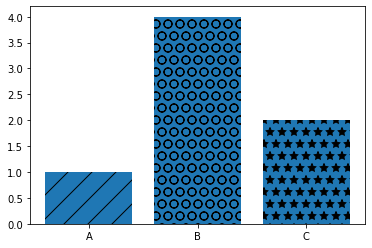

<Figure size 432x288 with 0 Axes>

In [4]:
labels = ['A','B','C']
values = [1,4,2]

bars = plt.bar(labels,values)
plt.figure(figsize=(6,4))

patterns = ['/','O','*']
for bar in bars:
  bar.set_hatch(patterns.pop(0))
# bars[0].set_hatch('/')
# bars[1].set_hatch('O')
# bars[2].set_hatch('*')


plt.show()

## Line Graph

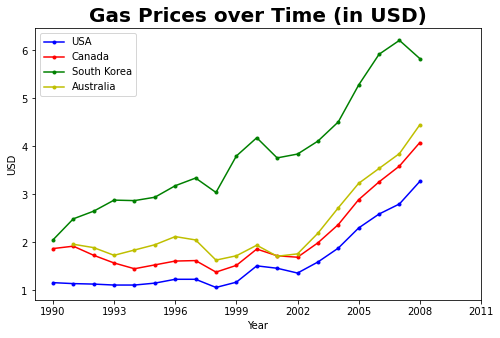

In [6]:
gas = pd.read_csv('/content/gas_prices.csv')

plt.figure(figsize=(8,5))
plt.title('Gas Prices over Time (in USD)',fontdict={'fontweight':'bold','fontsize':20})
plt.plot(gas.Year,gas.USA,'b.-',label='USA')
plt.plot(gas.Year,gas.Canada,'r.-',label='Canada')
plt.plot(gas.Year,gas['South Korea'],'g.-',label='South Korea')
plt.plot(gas.Year,gas.Australia,'y.-',label='Australia')
# Another way to plot many values!
# c_t_o = ['USA',"Canada"]
# for country in c_t_o:
#   if country != 'Year':
#      plt.plot(gas.Year,gas[country],marker='.')
  
plt.xticks(gas.Year[::3].tolist()+[2011])
plt.legend()
plt.xlabel('Year')
plt.ylabel('USD')
plt.savefig('Gas_price_figure.png',dpi=300)
plt.show()

#### Load Fifa Data

In [8]:
fifa = pd.read_csv('/content/fifa_data.csv',error_bad_lines=False)
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histograms

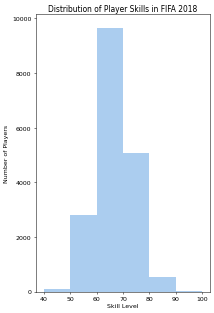

In [111]:
bins = [40,50,60,70,80,90,100]
plt.figure(figsize=(5,8),dpi=45)
plt.hist(fifa.Overall,bins=bins,color='#abcdef')
plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')



plt.show()

## Pie Charts

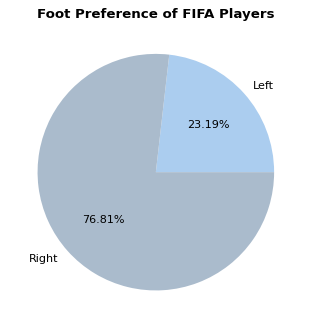

In [115]:
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]
plt.figure(dpi=80)
labels = ['Left','Right']
colors = ['#abcdef','#aabbcc']
plt.pie([left,right],labels=labels,colors=colors,autopct='%.2f%%')
plt.title('Foot Preference of FIFA Players',fontdict={'fontweight':'bold'})
plt.show()

In [116]:
fifa.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [118]:
fifa.Weight =[x.strip('lbs') if type(x)==str else x for x in fifa.Weight]

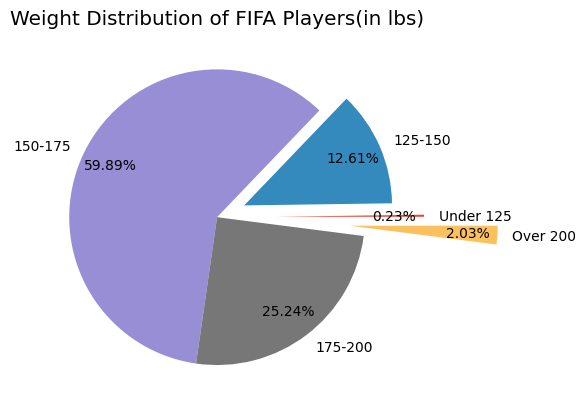

In [120]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count()[0]
medium = fifa.loc[(fifa.Weight>=150)&(fifa.Weight<175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight>=175)&(fifa.Weight<200)].count()[0]
heavy = fifa.loc[fifa.Weight>=200].count()[0]

plt.style.use('ggplot')

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']
explode=(.4,.2,0,0,.9)

plt.title('Weight Distribution of FIFA Players(in lbs)')
plt.pie(weights,labels=labels,autopct='%.2f%%',pctdistance=0.8,explode=explode)
plt.show()

## Box-whisker Plot

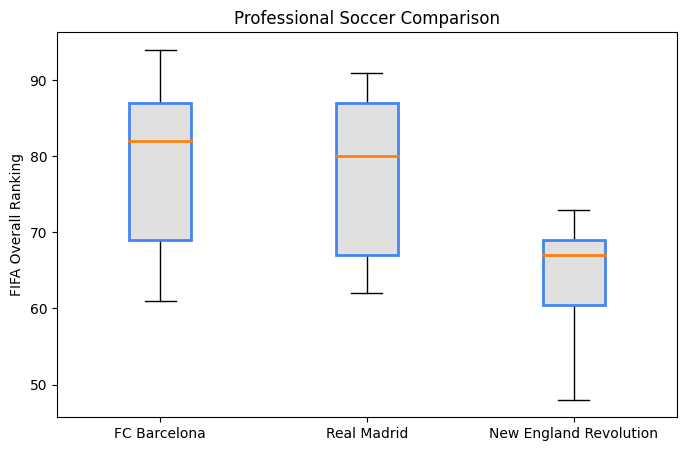

In [122]:
plt.style.use('default')
plt.figure(figsize=(8,5))
barcelona = fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
revs = fifa.loc[fifa.Club=='New England Revolution']['Overall']
labels = ['FC Barcelona','Real Madrid','New England Revolution']
boxes = plt.boxplot([barcelona,madrid,revs],labels=labels,patch_artist=True,medianprops={'linewidth':2})
for box in boxes['boxes']:
  # Set Edge Color
  box.set(color='#4286f4',linewidth=2)
  # Chanfe Fill Color
  box.set(facecolor='#e0e0e0')
plt.title('Professional Soccer Comparison')
plt.ylabel('FIFA Overall Ranking')
plt.show()